(512, 512)
uint8
Original Image


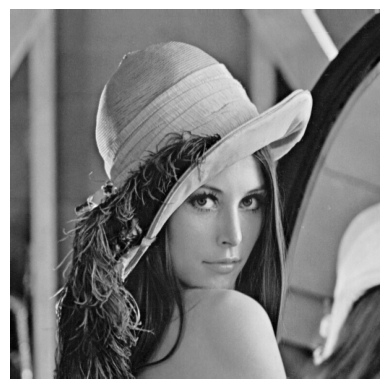

Down Sampled Image


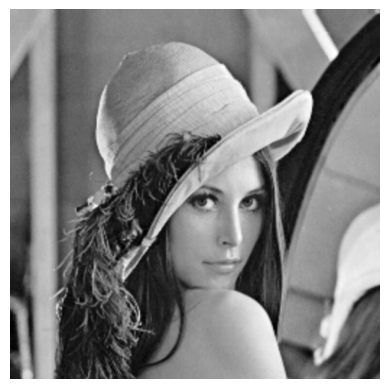

Upsampled Image


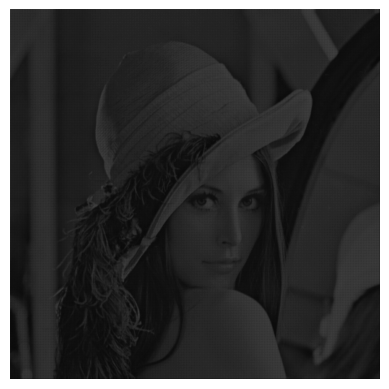

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def min_max_normalization(image):
    min_val = np.min(image)
    max_val = np.max(image)
    normalized_image = (image - min_val) / (max_val - min_val)
    return normalized_image

# Performing down sampling of the image
image = cv2.imread('/content/Lena.png', cv2.IMREAD_GRAYSCALE)
print(image.shape)
print(image.dtype)
normalized_image = min_max_normalization(image)
down_sampling = normalized_image[::2, ::2]
down_sampling2 = down_sampling[::2, ::2]
down_sampling_rescaled = (down_sampling * 255).astype(image.dtype)
down_sampling_rescaled = cv2.resize(down_sampling_rescaled, (image.shape[1], image.shape[0]))

print("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

print("Down Sampled Image")
plt.imshow(down_sampling_rescaled, cmap='gray')
plt.axis('off')
plt.show()

# Performing upsampling of the image by inserting an empty pixel between every and each pixel
height, width = image.shape

upsampled_image = np.zeros((2 * height, 2 * width), dtype=image.dtype)

#Filling in upsampled image
for i in range(height):
    for j in range(width):
        upsampled_image[2 * i, 2 * j] = image[i, j]


print("Upsampled Image")
plt.imshow(upsampled_image, cmap='gray')
plt.axis('off')
plt.show()


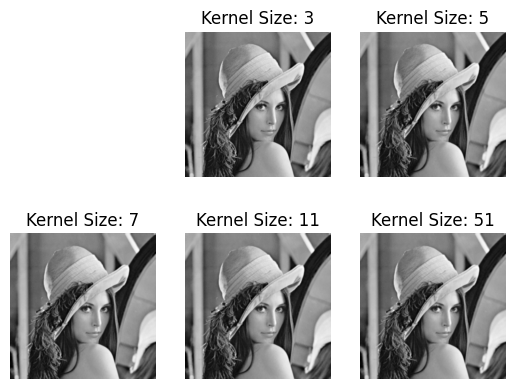

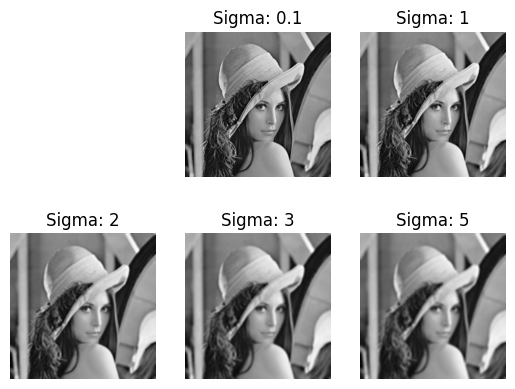

In [4]:
#Question 2
import matplotlib.pyplot as plt

def gaussian(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

def gaussian_kernel(size, sigma):
    kernel = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            distance = np.sqrt((i - size // 2) ** 2 + (j - size // 2) ** 2)
            kernel[i, j] = gaussian(distance, 0, sigma)
    kernel /= np.sum(kernel)

    return kernel

def convolve(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape
    pad_height = k_height // 2
    pad_width = k_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='reflect')
    convolved_image = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            region = padded_image[i:i + k_height, j:j + k_width]
            convolved_image[i, j] = np.sum(region * kernel)

    return convolved_image

kernel_sizes = [3, 5, 7, 11, 51]
sigma = 1.0
kernel = gaussian_kernel(kernel_sizes[-1], sigma)
smoothed_image = convolve(image, kernel)

for i, size in enumerate(kernel_sizes):
    kernel = gaussian_kernel(size, sigma)
    smoothed_image = convolve(image, kernel)
    plt.subplot(2, 3, i+2)
    plt.imshow(smoothed_image, cmap='gray')
    plt.title(f'Kernel Size: {size}')
    plt.axis('off')

plt.show()

#Now peforming on  s = {0:1; 1; 2; 3; 5} with fixed kernel size k = 11

s_values = [0.1, 1, 2, 3, 5]
kernel_size2 = 11
sigma = 1.0

for i, s in enumerate(s_values):
    kernel = gaussian_kernel(kernel_size2, s)
    smoothed_image = convolve(image, kernel)
    plt.subplot(2, 3, i+2)
    plt.imshow(smoothed_image, cmap='gray')
    plt.title(f'Sigma: {s}')
    plt.axis('off')


Upsampled Image After Gaussian Smoothing


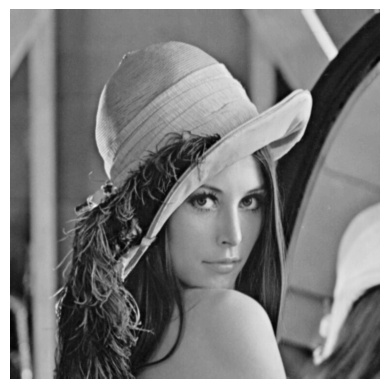

Median Filtered Image


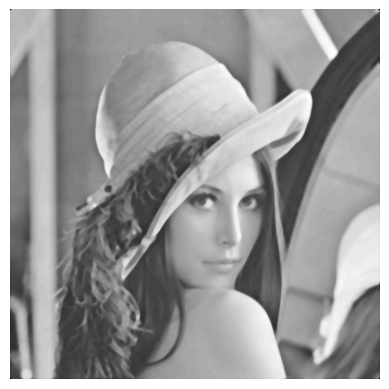

In [7]:
#Question 3
def median_filter(image, kernel_size=11):
    padded_image = np.pad(image, pad_width=kernel_size//2, mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]
            median_value = np.median(neighborhood)
            filtered_image[i, j] = median_value

    return filtered_image

upsampled_image = np.zeros((2 * height, 2 * width), dtype=image.dtype)
for i in range(height):
    for j in range(width):
        upsampled_image[2 * i, 2 * j] = image[i, j]

kernel_size = 11
sigma = 1.0

gaussian_k = gaussian_kernel(kernel_size, sigma)

smoothed_image = convolve(upsampled_image, gaussian_k)

print("Upsampled Image After Gaussian Smoothing")
plt.imshow(smoothed_image, cmap='gray')
plt.axis('off')
plt.show()

median_filtered_image = median_filter(smoothed_image, kernel_size=11)

print("Median Filtered Image")
plt.imshow(median_filtered_image, cmap='gray')
plt.axis('off')
plt.show()

Noisy Image


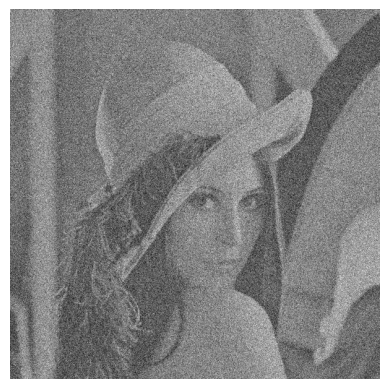

Median Filtered Image


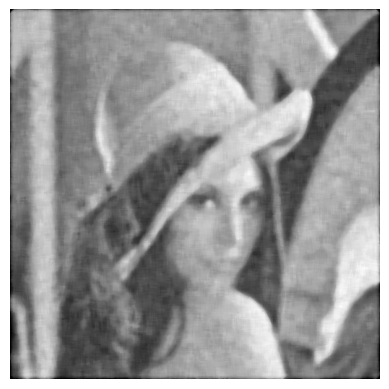

Smoothed Image


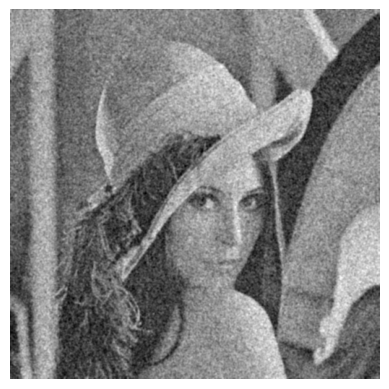

Modified Noisy Image


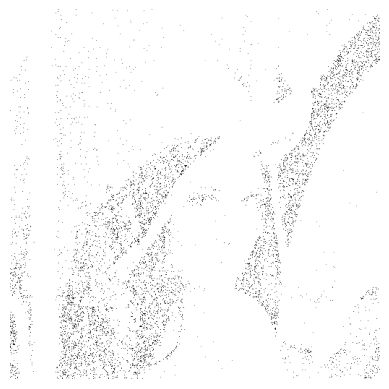

Smoothed Image after Modified Noise


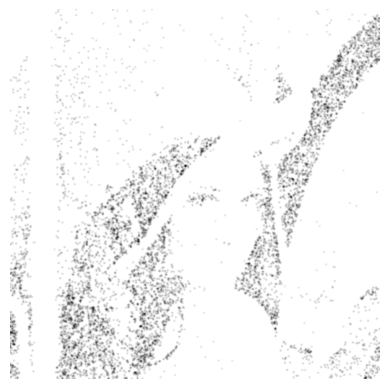

Median Filtered Image after Modified Noise and Smoothing


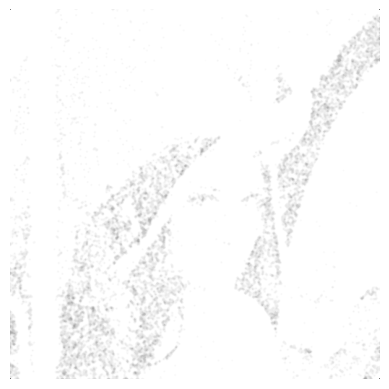

In [11]:
#Question 4
noise = np.random.normal(0, 50, (image.shape[0], image.shape[1]))
noisy_image = image + noise
img_noised = np.clip(noisy_image, 0, 255).astype(np.uint8)

print("Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.show()

gaussian_k = gaussian_kernel(kernel_size, sigma)

smoothed_image = convolve(noisy_image, gaussian_k)

median_filtered_noise_image = median_filter(noisy_image, kernel_size=11)

print("Median Filtered Image")
plt.imshow(median_filtered_noise_image, cmap='gray')
plt.axis('off')
plt.show()

print("Smoothed Image")
plt.imshow(smoothed_image, cmap='gray')
plt.axis('off')
plt.show()

noisy_image2 = np.where(noisy_image > 0.2, 1, 0)
modified_noisy_image = image + noisy_image2 * 255
modified_noisy_image = np.clip(modified_noisy_image, 0, 255).astype(np.uint8)

print("Modified Noisy Image")
plt.imshow(modified_noisy_image, cmap='gray')
plt.axis('off')
plt.show()

smoothed_image_modified = convolve(modified_noisy_image, gaussian_k)

print("Smoothed Image after Modified Noise")
plt.imshow(smoothed_image_modified, cmap='gray')
plt.axis('off')
plt.show()

median_filtered_modified = median_filter(smoothed_image_modified, kernel_size=3)

print("Median Filtered Image after Modified Noise and Smoothing")
plt.imshow(median_filtered_modified, cmap='gray')
plt.axis('off')
plt.show()

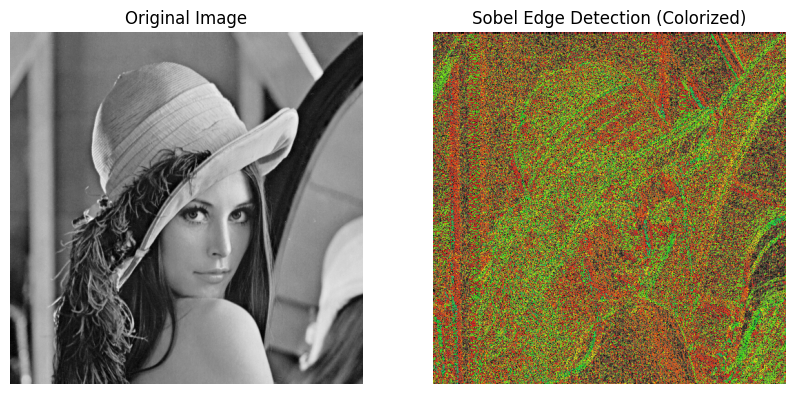

In [ ]:
#Question 5
def mySobelFilter(I):
    sobel_x = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]])

    sobel_y = np.array([[-1, -2, -1],
                       [0, 0, 0],
                       [1, 2, 1]])

    gradient_x = convolve(I, sobel_x)
    gradient_y = convolve(I, sobel_y)

    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    orientation = np.arctan2(gradient_y, gradient_x)

    magnitude = min_max_normalization(magnitude)


    return magnitude, orientation

magnitude, orientation = mySobelFilter(image)
hue = (orientation + np.pi) / (2 * np.pi) * 360

hsv_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
hsv_image[..., 0] = hue.astype(np.uint8)
hsv_image[..., 1] = (magnitude * 255).astype(np.uint8)
hsv_image[..., 2] = (magnitude * 255).astype(np.uint8)

rgb_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rgb_image)
plt.title('Sobel Edge Detection (Colorized)')
plt.axis('off')

plt.show()

